

# Data Preprocessing (Workbook)

### ITCS 5156:  Applied Machine Learning

# Goal

The goal of this activity is to practice data preprocessing techniques using Scikit.Learn and Pandas library. You will practice simple data cleaning, data reduction, transformation, and discretization with real world datasets. Follow the TODO titles and comments to finish the activity!

# Agenda

* Data Preparation
  * Data visualization
* Data Cleaning   (auto MPG)
* Data reduction  (wine)
* Data Transformation (forest fires & wine)
* Data Discretization
* Integration with Linear Regression

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1)
2. [TODO2 (5 points)](#TODO2)
3. [TODO3 (5 points)](#TODO3)
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (5 points)](#TODO5)
6. [TODO6 (5 points)](#TODO6)
7. [TODO7 (5 points)](#TODO7)
8. [TODO8 (5 points)](#TODO8)
9. [TODO9 (5 points)](#TODO9)
10. [TODO10 (5 points)](#TODO10)
12. [TODO11 (5 points)](#TODO11)
13. [TODO12 (5 points)](#TODO12)
13. [TODO13 (5 points)](#TODO13)
14. [TODO14 (5 points)](#TODO14)
15. [TODO15 (5 points)](#TODO15)
16. [TODO16 (10 points)](#TODO16)
17. [TODO17 (13 points)](#TODO17)
18. [Feedback (2 points)](#TODO18)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy

%matplotlib inline

# Data Preparation


This week, we will reuse the data in the previous labs including the [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality), [Forest Fire](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv), and [Auto MPG](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original). Make sure place the data files in the working folder to start the following exercies.

<table>
    <tr>
        <td><img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" /></td>
        <td><img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large162.jpg" /></td>
        <td><img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large9.jpg" /></td>
    </tr>
</table>


## Reading all the data

<div id='TODO1'></div>

### TODO1 (5 points):

As usual, start loading all three data using pandas.

1. Load the wine quality data into variable `dfwine` using pandas library.
1. Load the forestfire data into variable `dffire` using pandas library.
1. Load the auto MPG data into variable `dfauto` using pandas library.
2. Print out the dataframes.


In [ ]:
# TODO: read all three data
dfwine = pd.read_csv('winequality-red.csv', delimiter=';')
dffire = pd.read_csv("forestfires.csv")
dfauto = pd.read_csv('auto-mpg.data-original', delim_whitespace=True, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])



display(dfwine)
display(dffire)
display(dfauto)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


# Data Cleaning

As the first step of data preprocessing, let us make sure our data to be clean. Do you remember that we already did data cleaning in our first lab? You can go back and take a look at how you did with Auto MPG data.

Yes, we drop the data samples with missing data. Let us repeat that first.


<div id='TODO2'></div>

### TODO2 (5 points):

1. Refer to the first lab (TODO11), clean your Auto-MPG data by simply dropping the rows with missing values.
2. Store the cleaned data to `dfauto_ign`.

In [ ]:
print(dfauto.shape)

# TODO: remove data samples with missing values
dfauto_ign = dfauto.dropna()

print(dfauto_ign.shape)

(406, 9)
(392, 9)


We can store the indices of the data samples with missing values for later reference.

In [ ]:
i_missing = np.where(dfauto.isna())[0]

In [ ]:
dfauto.iloc[i_missing, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


## Most Frequent Imputation

Let us now practice to impute the missing values with mean of the data.

<div id='TODO3'> </div>

### TODO3 (5 points):

1. Using `SimpleImputer` in Scikit-Learn, replace the missing values (NaN) with the most frequent values in the data.
2. Store the clean data to `dfauto_freq`.


In [ ]:
# TODO: import proper object
from sklearn.impute import SimpleImputer

# TODO: create an instance for imputation and clean the data
#       Don't forget to convert the data in DataFrame
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfauto_freq = pd.DataFrame(imp.fit_transform(dfauto), columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin'])

np.any(dfauto_freq.isna())


False

In [ ]:
dfauto_freq.iloc[i_missing, :]

,0,1,2,3,4,5,6,7,8
10,13,4,133,115,3090,17.5,70,2,citroen ds-21 pallas
11,13,8,350,165,4142,11.5,70,1,chevrolet chevelle concours (sw)
12,13,8,351,153,4034,11,70,1,ford torino (sw)
13,13,8,383,175,4166,10.5,70,1,plymouth satellite (sw)
14,13,8,360,175,3850,11,70,1,amc rebel sst (sw)
17,13,8,302,140,3353,8,70,1,ford mustang boss 302
38,25,4,98,150,2046,19,71,1,ford pinto
39,13,4,97,48,1978,20,71,2,volkswagen super beetle 117
133,21,6,200,150,2875,17,74,1,ford maverick
337,40.9,4,85,150,1835,17.3,80,2,renault lecar deluxe


## Mean Imputation

I admit most frequently appeared values have higher chances to reappear but it may not be true always. Let us see if we can replace the data with average of the column rather than the most frequent values.

<div id='TODO4'> </div>

### TODO4 (5 points):

1. Using `SimpleImputer` in Scikit-Learn, replace the missing values (NaN) with the most frequent values in the data.
2. Store the clean data to `dfauto_mean`.

* HINT: You can simply copy and paste the above cell to modify.

In [ ]:
# TODO: follow the instruction above and complete the codes here
from sklearn.impute import SimpleImputer

# TODO: create an instance for imputation and clean the data
#       Don't forget to convert the data in DataFrame
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
dfauto_freq = pd.DataFrame(imp.fit_transform(dfauto))

np.any(dfauto_freq.isna())

False

Whaaaaaaaaaaat?

You must have followed the instructions but ended up with an error! If you look into the error, you can see that the imputer complains that it cannot apply the mean strategy for the string values.

Well, the trueth is we do not have any missing values in that string column.
So, before moving forward, let us think about the car name column for a moment.


By running the cell below, you can see how many unique car names are in this data set.

In [ ]:
dfauto['car name'].unique()

KeyError: ignored

In [ ]:
len(dfauto['car name'].unique())

312

Wait. 312 car names?
How many data samples did we have?

In [ ]:
dfauto.shape

(406, 9)

Out of 406 data samples, you have 312 unique car names. You have almost unique car names for each data sample. Is it useful? Maybe not.

As we have trouble in imputing the column as well, let us discard the column then repleace the missing values with the average.

<div id='TODO5'> </div>

### TODO5 (5 points):

Let's naively drop 'car name'  for now so we can run mean imputation.

1. Modify TODO4 to dropping the 'car name' column so we can run mean imputation. Once you have ran mean imputation, store the results in the `dfauto_mean` variable.


In [ ]:
# TODO: slice out the last column from dfauto
dfauto = dfauto.drop('car name',axis=1)
dfauto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [ ]:
# TODO: Complete the modifyed TODO4 to produce the same output below.

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
dfauto_mean = pd.DataFrame(imp.fit_transform(dfauto), columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin'])


display(dfauto_mean)
np.any(dfauto_mean.isna())


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


False

Let us see how the replaced values look like.

In [ ]:
dfauto_mean.iloc[i_missing, :]

,0,1,2,3,4,5,6,7
10,23.514573,4.0,133.0,115.0000,3090.0,17.5,70.0,2.0
11,23.514573,8.0,350.0,165.0000,4142.0,11.5,70.0,1.0
12,23.514573,8.0,351.0,153.0000,4034.0,11.0,70.0,1.0
13,23.514573,8.0,383.0,175.0000,4166.0,10.5,70.0,1.0
14,23.514573,8.0,360.0,175.0000,3850.0,11.0,70.0,1.0
17,23.514573,8.0,302.0,140.0000,3353.0,8.0,70.0,1.0
38,25.000000,4.0,98.0,105.0825,2046.0,19.0,71.0,1.0
39,23.514573,4.0,97.0,48.0000,1978.0,20.0,71.0,2.0
133,21.000000,6.0,200.0,105.0825,2875.0,17.0,74.0,1.0
337,40.900000,4.0,85.0,105.0825,1835.0,17.3,80.0,2.0


Now the replaced values are different from the ones with the previous frequency imputation.


## Nearest Neighbor Imputation

Let us try a bit smarter imputation. Instead of using the average of all the data samples, rely only on its neighbors.

<div id='TODO6'></div>

### TODO6 (5 points):

1. Using `KNNImputer`, replace the missing values with the average (`uniform`) of the 5 neighbors' values.
2. Store the clean data to `dfauto_knn`.
* NOTE: Don't forget to drop the string column, `car name`.

In [ ]:
# TODO: import the proper object here
from sklearn.impute import KNNImputer

# TODO: finish the codes as instructed above
imp = KNNImputer(n_neighbors=5)

dfauto_knn = pd.DataFrame(imp.fit_transform(dfauto), columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin'])

display(dfauto_knn)
np.any(dfauto_knn.isna())


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


False

In [ ]:
dfauto_knn.iloc[i_missing, :]

,0,1,2,3,4,5,6,7
10,20.16,4.0,133.0,115.0,3090.0,17.5,70.0,2.0
11,14.80,8.0,350.0,165.0,4142.0,11.5,70.0,1.0
12,14.10,8.0,351.0,153.0,4034.0,11.0,70.0,1.0
13,14.70,8.0,383.0,175.0,4166.0,10.5,70.0,1.0
14,17.34,8.0,360.0,175.0,3850.0,11.0,70.0,1.0
17,17.78,8.0,302.0,140.0,3353.0,8.0,70.0,1.0
38,25.00,4.0,98.0,62.0,2046.0,19.0,71.0,1.0
39,35.62,4.0,97.0,48.0,1978.0,20.0,71.0,2.0
133,21.00,6.0,200.0,107.6,2875.0,17.0,74.0,1.0
337,40.90,4.0,85.0,64.6,1835.0,17.3,80.0,2.0


The replaced values are not same as before, which may be more reasonable than the other naive approaches. Let us save the data for later linear model practice.  

# Data Reduction

Now, let us switch the gear and practice reducing the data. As we learn in the lecture, we can either reduce the dimensionality of data or reduce the number of data samples. Let us briefly taste them.

Here we practice subsampling to reduce the data. Subsampling is often useful to avoid computational overhead when it is properly used (without breaking original distribution of data). Scikit-Learn resample is designed for bootstraping by performing one-step for it. If you are interested in bootstrapping, please refer to these gentle introductions ([one](https://statisticsbyjim.com/hypothesis-testing/bootstrapping/), [another](https://online.stat.psu.edu/stat555/node/119/)).

<div id='TODO7'></div>


### TODO7 (5 points):

1. Using `sklearn.utils.resample`, sample only 100 samples from the wine data `dfwine`.
2. Store it to `dfwine_sample`.

In [ ]:
dfwine.shape

(1599, 12)

In [ ]:
from sklearn.utils import resample

# TODO: retrieve 100 random samples
dfwine_sample = resample(dfwine, n_samples=100)

display(dfwine_sample)
dfwine_sample.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
249,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6
1203,9.9,0.74,0.19,5.8,0.111,33.0,76.0,0.99878,3.14,0.55,9.4,5
860,7.2,0.62,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
1489,6.2,0.57,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6
1222,8.1,0.53,0.22,2.2,0.078,33.0,89.0,0.99678,3.26,0.46,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
110,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,5
1318,7.5,0.63,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
1079,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
1199,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6


(100, 12)

Do you remember how many data samples we had in each quality values? To remind ourselves, we can plot the histogra again.

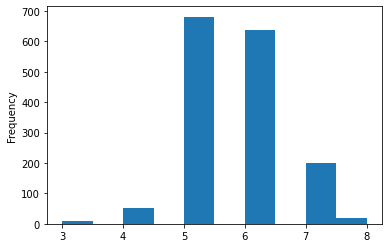

In [ ]:
dfwine['quality'].plot.hist()

OK, after resampling, does this distribution changed? Let us check.

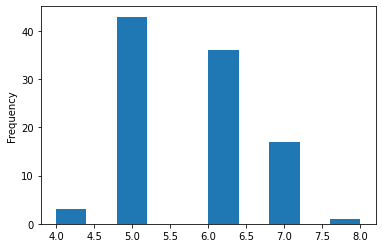

In [ ]:
dfwine_sample['quality'].plot.hist()

Wow, the sample distribution has been changed quite a lot. Well, this might not what we intended to do. For instance, when you have data with different distributions, the diference in the quantity of data can easily mess up your prediction model as the prediction error can be greatly penalized by the majority. Therefore, sampling some **representative data** from each subgroup is more useful as the following practice.

Try to sample data without change the output distribution. We call this stratified sampling, which samples from each subpartitions (strata). The figure below from Wikipedia illustrates well the stratified sampling.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Stratified_sampling.PNG/220px-Stratified_sampling.PNG)

<div id='TODO8'></div>

### TODO8 (5 points):

1. Call `resample` function to sample 100 samples but using `stratify` option.
2. Store the samples to `dfwine_strat`.
* HINT: refer to the [reference](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) to know how to use the option.

In [ ]:
# TODO: run stratified sampling
dfwine_strat = resample(dfwine, n_samples=100, stratify=dfwine)

display(dfwine_strat)
# TODO: plot the histogram of dfwine_strat


dfwine_strat.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1499,6.9,0.740,0.03,2.30,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,6
1208,7.2,0.360,0.46,2.10,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7
1006,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
1099,8.6,0.520,0.38,1.50,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
449,11.9,0.390,0.69,2.80,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,7.6,0.645,0.03,1.90,0.086,14.0,57.0,0.99690,3.37,0.46,10.3,5
660,7.2,0.520,0.07,1.40,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
1074,7.5,0.770,0.20,8.10,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5
870,7.7,0.715,0.01,2.10,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6


(100, 12)

## Dimensionality Reduction

High dimensionality of data causes various problems known as *Curse of dimensionality*. One notable thing that we can easily assume is the computational complexity. Also, the model performance (accuracy and stability) drops very quickly as the complexity of problem surges when the dimensionality grows.  

We will learn more about dimensionality reduction in Unsupervised Learning module later in this semester. For now, let us practice simple Principal Component Analysis (PCA) just for tasting.
PCA finds a project that caputres the largest amount of variation in data, so we can discard pricipal components that have low variations (so less impact on model prediction). Please hold your curiosity for the fun later.

<div id='TODO9'></div>

### TODO9 (5 points):

Do you remember that many of the weights of the linear regression models are close to zero? Maybe the linear model does not use many of the input variables. Let us try to reduce the dimensionality using PCA to reduce the dimension.

1. Create a PCA instance using `sklearn.decomposition.PCA`.
3. Using the PCA instance,


In [ ]:
# TODO: import the proper object here
from sklearn.decomposition import PCA
print(dfwine.shape)

# TODO: create an instance
pca =  PCA()

# TODO: run pca to reduce dimensionality
dfwine_pca = pca.fit(dfwine)

display(dfwine_pca)

# percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

(1599, 12)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

array([9.46079514e-01, 4.83483474e-02, 2.59599087e-03, 1.52288677e-03,
       1.04910404e-03, 3.34987986e-04, 3.10082440e-05, 1.93440109e-05,
       9.43889374e-06, 8.17881393e-06, 1.19899823e-06, 4.68306222e-10])

# Data Transformation

When we have different scale of input data, the weight analysis we did last week can be misleading as we did not consider the different input scales. Not only for the accuracy of ML models, for the analysis, it is also important to have scaled input values. In the learning perspective, when updating the parameters of the ML models, different scales often misguide the direction of changes, which are often dominated by the large values.

By normalizing the inputs, we can scale the input features to similar range.


<div id='TODO10'></div>


### TODO10 (5 points):

1. Using `Normalizer` (max norm), scale the input of wine data `dfwine` and store to `dfwine_scalemax`.


In [ ]:
#TODO: import the proper object here
from sklearn.preprocessing import Normalizer

# TODO: perform normalization as instructed
scaler = Normalizer()
dfwine_scalemax = pd.DataFrame(scaler.transform(dfwine))

dfwine_scalemax.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.215313,0.013444,0.006922,0.062610,0.002210,0.305282,0.823186,0.025545,0.084877,0.016670,0.269655,0.145597
std,0.123825,0.009042,0.006969,0.043870,0.001614,0.114296,0.127156,0.013206,0.044087,0.009074,0.146528,0.079768
min,0.027054,0.001027,0.000000,0.007761,0.000112,0.021607,0.325111,0.003401,0.010308,0.001747,0.042122,0.023972
25%,0.114058,0.007056,0.001896,0.033486,0.001156,0.218865,0.759075,0.014536,0.048592,0.009351,0.149010,0.078805
50%,0.183688,0.011177,0.004321,0.052861,0.001865,0.291105,0.849563,0.023041,0.076643,0.014783,0.241074,0.130899
75%,0.296968,0.017290,0.010001,0.077837,0.002762,0.382126,0.919613,0.035081,0.116043,0.022927,0.372155,0.200347
max,0.661059,0.089465,0.035993,0.480944,0.018949,0.618892,0.989920,0.062126,0.209330,0.057165,0.710668,0.395291


## Standardization

<div id='TODO11'></div>

### TODO11 (5 points):

1. Now scale the wine data `dfwine` with `StandardScaler` and store it to `dfwine_zscale`.

In [ ]:
#TODO: import the proper object here
from sklearn.preprocessing import StandardScaler

# TODO: perform normalization as instructed
scaler = StandardScaler()
dfwine_zscale = pd.DataFrame(scaler.fit_transform(dfwine))

dfwine_zscale.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,2.336509e-14,3.002879e-15,7.639596e-16,9.437243e-16,-8.051373e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


<div id='TODO12'></div>

### TODO12 (5 points):

`TODO12` What similarity and difference of `dfwine_scalemax` and `dfwine_zsclae` do you observe from above output tables?   

`Answer`zscale puts everything into scientific notation, they both keep the same ratio and reduces the data into smaller values.

## Transformation of Forest Fire Data

Adding to the visualization we practiced last week, let's use the data to now visualize the burned areas at any given location in Montesinho park. Luckily, the data provides us with some simple x-y coordinates for every sample in the data. Thus, we can use these x-y coordinates to make a contour graph where brighter colors indicate larger amounts of burned forest area at a given x-y point.

In order to create a contour graph we need to create a mesh-grid. This essentially allows us to make a Cartesian coordinate system. This mesh-grid will be required by the `plt.contourf()` function in order to match the x-y coordinates to the total burned forest area at each coordinate point.

Here we can see the x-y coordinates and the burned forest area for each data sample. Notice, there are duplicates of the x-y coordinates. This means multiple data samples can have the same x-y coordinates. This will be important when calculating the total burned forest area at a given x-y coordinate!

In [ ]:
dffire.loc[:, ['X', 'Y', 'area']]

,X,Y,area
0,7,5,0.00
1,7,4,0.00
2,7,4,0.00
3,8,6,0.00
4,8,6,0.00
...,...,...,...
512,4,3,6.44
513,2,4,54.29
514,7,4,11.16
515,1,4,0.00


### Creating the mesh-grid

Here we create a mesh-grid using `np.meshgrid`. Before we do so we have to specify the domain for the x-axis and y-axis. We can generate the x-axis and y-axis domains by using Numpy's `np.arange()` function. The `np.arange()` function will generate a Numpy array object filled with integers up to, but not including, the given 'stop' number.

To generate the x-axis and y-axis domains we first need to know the maximum and minimum values for the columns 'X' and 'Y'. Otherwise, how would we know where to begin or end the x-axis and y-axis?

To find the maximum of 'X' and 'Y' values in the data we use the following code. Here we can see that both max values are 9!

In [ ]:
dffire.loc[:, ['X', 'Y']].max(axis=0)

X    9
Y    9
dtype: int64

Here is the code for finding the minimum values. The minimum values here are 1 and 2!

In [ ]:
dffire.loc[:, ['X', 'Y']].min(axis=0)

X    1
Y    2
dtype: int64

In the below code we set our minimum domain element to 0 `start=0` as 0 is sufficiently low enough for both 'X' and 'Y’ according to the minimums given above . Next, we set our maximum domain for both 'X' and 'Y’ to 10 `stop=11` as 10 is sufficiently high enough according to the maximums.

In [ ]:
x_domain, y_doamin = np.arange(start=0, stop=11), np.arange(start=0, stop=11)
print("Domain for the x-axis: {}".format(x_domain))
print("Domain for the y-axis: {}".format(y_doamin))

Domain for the x-axis: [ 0  1  2  3  4  5  6  7  8  9 10]
Domain for the y-axis: [ 0  1  2  3  4  5  6  7  8  9 10]


Now it's time to see what exactly a mesh-grid is! Here, we input both `x_domain` and `y_domain` into `np.meshgrid()` to create a mesh-grid which outputs two more Numpy arrays. The variable `xs` corresponds to the x-axis of the mesh-grid while `ys` corresponds to the y-axis of the mesh-grid. Together these two Numpy arrays make a mesh-grid!

In [ ]:
xs, ys = np.meshgrid(x_domain, y_doamin)

print(xs)
print(ys)

[[ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]]
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10 10]]


### Calculating total burned forest area
Now, we need to calculate the totaled burned forest area for each unique x-y coordinate in our dataset. To make our lives easier let's first filter out all the data samples that have 0 burned forest area. In addition, let's go ahead and extract out only the 'X', 'Y', and 'area' columns.

In [ ]:
burned = dffire.loc[dffire.loc[:, 'area'] > 0, ['X', 'Y', 'area']]
burned

,X,Y,area
138,9,9,0.36
139,1,4,0.43
140,2,5,0.47
141,1,2,0.55
142,8,6,0.61
...,...,...,...
509,5,4,2.17
510,6,5,0.43
512,4,3,6.44
513,2,4,54.29


Finally, we can calculate the total burned forest area for each unique x-y coordinate. To track the total burned forest area we want to map each x-y coordinate to the sum of the burned forest area at a given coordinate. To do so we need to create a total burned forest area Numpy array called `zs`. We can simply reuse the shape from `xs` or `ys` to make sure we cover every possible x-y coordinate point. To find the total burned forest area we iterate through the `burned` DataFrame adding the 'area’ value of each data sample to its corresponding x-y coordinate location in `zs`.

In [ ]:
zs = np.zeros(xs.shape)
zs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**It should be noted when mapping an array to x-y coordiantes the rows of the array correspond to the y-axis and the columns correspond to the x-axis!** It might help you to think about Numpy arrays as inverted coordinate planes, which look like the following image!

![inverted](https://support.cognex.com/docs/cvl_900/web/EN/cvl_users_guide/Content/Images/11_6.jpg)

In [ ]:
fig = plt.figure()
zs = np.zeros(xs.shape)
i = 0
for _, sample in burned.iterrows():
    i+= 1
    x, y = int(sample['X']), int(sample['Y'])
    # print("x-y ({}, {}) = {}".format(x, y, sample['area']))
    zs[y, x] += sample['area']


<Figure size 432x288 with 0 Axes>

Here's what `zs` looks like after calculating the total burned forest area at each of the x-y coordinates.

In [ ]:
pd.DataFrame(zs)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.0,219.94,462.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,0.0,157.14,0.00,6.58,172.88,0.00,192.78,27.35,26.31,0.00,0.0
4,0.0,150.28,143.37,126.35,397.43,73.75,144.47,474.37,12.18,185.61,0.0
5,0.0,115.47,92.63,2.18,287.01,0.00,1384.05,77.39,2.93,8.16,0.0
6,0.0,0.00,0.00,0.00,87.73,17.62,8.59,86.45,1265.30,42.87,0.0
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,185.76,0.00,0.0
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.47,0.0


Now comes plotting. We can use `plt.contourf` function to plot the burned forest area at a given location. Here, brighter colors correspond to larger amounts of forest area burned.

Notice, that the `plt.contourf` successfully plotted our data in a normal coordinate plane even though our mesh-grid and `zs` were structured as inverted coordinate grids. We can thank Matplotlib for automatically converting our inverted plane, given via the Numpy arrays, to a normal plane!

If you are confused by anything up to this point please raise your hand and ask, send us an email, or create on post on Piazza! This goes for anything you encounter in the labs as well!

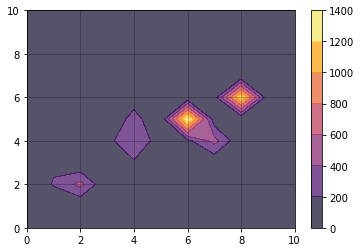

In [ ]:
plt.contourf(xs, ys, zs, alpha=0.7, cmap=plt.cm.inferno,)
plt.colorbar()
plt.grid(c='k', ls='-', alpha=0.3)

Notice how all the bright areas on the contour plot have extremely high values (check  out the output of `pd.DataFrame(zs)` above for the exact numbers). This makes many of the other x-y coordinate points that have lower values for the total burned forest area harder to see. It's as if our data was skewed! If only there was a trick to deal with skewed data...

Right, there is a way! Remember from last week we took the log of our target 'area' to help alleviate its “skewedness”. Let's do the same thing again but now apply the log to `zs` our total burned forest area!

## Transformation of Forest Fire Data

### Alleviating a heavy tailed distribution

Now, let us fix our skewed target data `T` by taking the log of all the samples in `T`.
   
    

<div id='TODO13'></div>

### TODO13 (5 points):

1. Take the log of `T` storing it in a new variable `Tlog`
    - Don't forget you can't calculate log(0), try adding one to EVERY sample! If you only add 1 to certain samples this biases the data!
    - You can consider to use `numpy.log1p` for it.
    
2. Plot the histogram of the target `area` before after the logarithm.


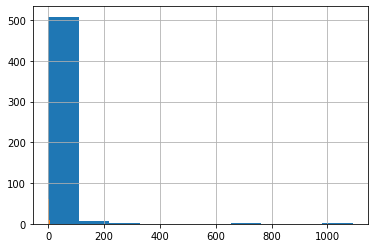

In [ ]:
dffire['area'].hist()

# TODO: Take the log of dffire['area'] storing it in a new variable log_area
log_area = np.log1p(dffire['area'])

# TODO: plot the histogram of log_area
log_area.hist()



## Indicator (Dummy/One-Hot) Variables

Now, we can practice one more useful trick, indicator variables. When we observe some categorical variables, sometimes scale is often not reasonable. For instance, let us assume we have the inputs of cat or dog.  Is it reasonable if we allocate 1 to cat and 2 to dog? Can we say that dog $>$ cat as 2 $>$ 1? No, we can't. For this reason, we convert the categorical values to indicator variables or one-hot encodings. Instead of 1 or 2 for cat or dog, we use vector representations. For instance, `[0, 1]` could be for cat and `[1, 0]` could be for dog.

Follow the code for how we can covert the string values into indicator variables using `pd.get_dummies()` function in Pandas.


<div id='TODO14'></div>

### TODO14 (5 points):

1. Refering to the lecture slides (using `get_dummies` in Pandas), convert `month` and `day` column to indicator variables.
2. Store each conversion to `indicator_month` and `indicator_day` respectively.


In [ ]:
dffire.loc[:,'month']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [ ]:
# TODO: convert month to indicator variables
indicator_month = pd.get_dummies(dffire['month'])
indicator_month

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TODO: convert day to indicator variables
indicator_day = pd.get_dummies(dffire['day'])
indicator_day

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


<div id='TODO15'></div>

### TODO15 (5 points):

1. Now repeat the indicator variable conversion with `OneHotEncoder` in Scikit-Learn.
2. For this, you don't need to convert individual column separately. Slice both `month` and `day` and then transform the sliced DataFrame.
3. Store the indicator variables into `indicator_md`.

In [ ]:
dffire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
dffire['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
dffire[['month', 'day']]

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


In [ ]:
# TODO: Import the proper object here
from sklearn.preprocessing import OneHotEncoder

# TODO: one-hot encoding here
enc = OneHotEncoder()
x = dffire[['month', 'day']]




indicator_md = pd.DataFrame(enc.fit_transform(x))

indicator_md

,0
0,"(0, 7)\t1.0\n (0, 12)\t1.0"
1,"(0, 10)\t1.0\n (0, 17)\t1.0"
2,"(0, 10)\t1.0\n (0, 14)\t1.0"
3,"(0, 7)\t1.0\n (0, 12)\t1.0"
4,"(0, 7)\t1.0\n (0, 15)\t1.0"
...,...
512,"(0, 1)\t1.0\n (0, 15)\t1.0"
513,"(0, 1)\t1.0\n (0, 15)\t1.0"
514,"(0, 1)\t1.0\n (0, 15)\t1.0"
515,"(0, 1)\t1.0\n (0, 14)\t1.0"


We can slice the all the other columns but month and day as below.

In [ ]:
display(dffire.iloc[:, :2])
display(dffire.iloc[:, 4:])

,X,Y
0,7,5
1,7,4
2,7,4
3,8,6
4,8,6
...,...,...
512,4,3
513,2,4
514,7,4
515,1,4


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Now, you can combine the all the features into one DataFrame.

In [ ]:
pd.concat([dffire.iloc[:, :2],
        indicator_md,
        dffire.iloc[:, 4:]], axis=1)


,X,Y,0,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,"(0, 7)\t1.0\n (0, 12)\t1.0",86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,"(0, 10)\t1.0\n (0, 17)\t1.0",90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,"(0, 10)\t1.0\n (0, 14)\t1.0",90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,"(0, 7)\t1.0\n (0, 12)\t1.0",91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,"(0, 7)\t1.0\n (0, 15)\t1.0",89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,"(0, 1)\t1.0\n (0, 15)\t1.0",81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,"(0, 1)\t1.0\n (0, 15)\t1.0",81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,"(0, 1)\t1.0\n (0, 15)\t1.0",81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,"(0, 1)\t1.0\n (0, 14)\t1.0",94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Linear Regression

It was a bit long practice to prepare data. Now, we bring ML tools to fit the preprocess data.
Let us use the linear regression algorihtms for the following exercises.

<div id='TODO16'></div>

### TODO16 (10 points):

Let us see how the data clean affects the performance of Auto MPG predictions.
We predict `mpg` column (the first column), so we need to properly split it to `T` from the others, which are input `X`.

In a loop,
1. define `X` and `T`.
2. split the training and test data in 80/20 ratio.
3. Create a linear regression instance (of your choice. anyone that we practiced last week should be fine.).
4. Train the model.
5. Compute the training and test error using `score` method.
6. Do you see any difference? What impact of data cleaning do you observe?


In [ ]:
dfauto['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. ,  nan, 24. , 22. , 21. , 27. , 26. ,
       25. , 10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. ,
       35. , 20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5,
       29.5, 26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1,
       36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6,
       18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6,
       16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4,
       34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2,
       26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8,
       44.3, 43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6,
       25.8, 23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7,
       32.9, 31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

Train score:  0.8277189868298389
Test score:  0.7878616315590748
Train score:  0.7964688671081712
Test score:  0.7947718912352306
Train score:  0.7960525475720921
Test score:  0.7865088711994594
Train score:  0.8162543966401162
Test score:  0.8234505718064209


Text(0, 0.5, '$R^2$')

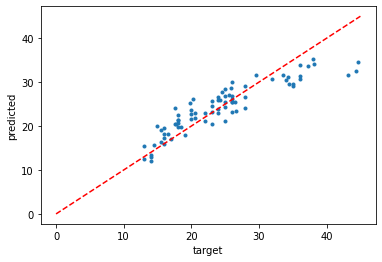

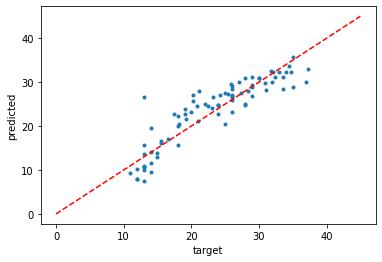

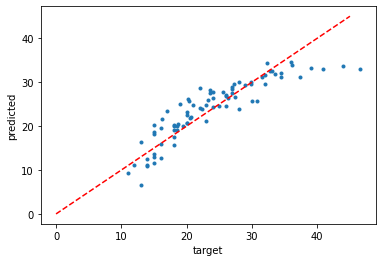

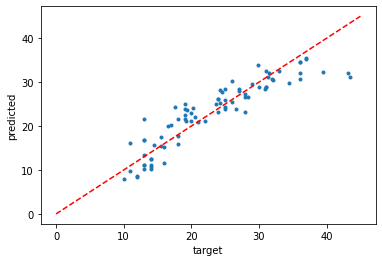

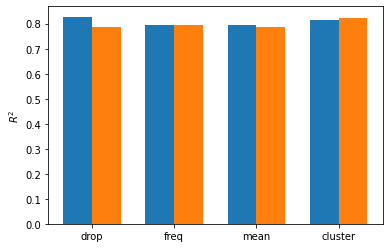

In [ ]:
from sklearn.linear_model import LinearRegression     # TODO: import the model that you want
from sklearn.model_selection import train_test_split

# cleaned dataframes
dfs = [dfauto_ign.iloc[:, :-1], dfauto_freq.iloc[:, :-1], dfauto_mean, dfauto_knn]
# short names of the cleaning methods
names = ["drop", "freq", "mean", "cluster"]

trainerr = []
testerr = []

for df in dfs:

    # TODO: Create X and T for input and target label
    # first column is target
    X = df.drop('mpg',axis=1)
    T = df.mpg

    # TODO: split the train/test
    X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)


    # TODO: create a linear regression model instance
    model = LinearRegression()

    # TODO: train the model with training data
    model.fit(X_train, t_train)

    # 5) evaluate
    trainerr.append(model.score(X_train, t_train))
    testerr.append(model.score(X_test, t_test))
    print("Train score: ", trainerr[-1])
    print("Test score: ", testerr[-1])

    # present prediction-vs-target plot
    plt.figure()
    y_test = model.predict(X_test)
    plt.plot(t_test, y_test, '.')
    plt.plot([0,45], [0, 45], 'r--')
    #plt.xlim([2.5, 8.5])
    #plt.ylim([2.5, 8.5])
    plt.xlabel("target")
    plt.ylabel("predicted")



# plot the bar chart to compare the performance
plt.figure()
x = np.arange(len(names))
width = 0.35
plt.bar(x - width/2, trainerr, width, label='train')
plt.bar(x + width/2, testerr, width, label='test')

plt.xticks(x, names)
plt.ylabel("$R^2$")


`TODO16.6` Do you see any difference? What impact of data cleaning do you observe?

`Answer` Cleaning the data seems to add a good amount of accuracy, the cluster method had the best train/test results.  

## Pipelining scaling and dimensionality reduction

Now, let us combine transformation, reduction, and machine learning in a pipeline to build multiple versions of classifier and apply them to the wine quality data. To see the impact of normalization, let us use `SGDRegressor` for our choice of algorithm here.


<div id='TODO17'></div>

### TODO17 (13 points):

1. Given the list `preps`, loop through each item for the choice of scaling.
2. The innter loop is for using PCA for dimensionality reduction. In the if-statement, create a proper pipeline object that matches with the name addition.
3. Train the piplelined SGD regression model.
4. Observe the results and share your thoughts about the difference with/without scaling or dimensionality reduction.

Train score:  -5.723033444513915e+22
Test score:  -5.346055107071336e+22
Train score:  -1.071264855401723e+19
Test score:  -9.559624116535566e+18
Train score:  0.040320267180451785
Test score:  -0.001428971898769893
Train score:  0.05108215043879405
Test score:  0.024315344332086042
Train score:  0.3694159651453389
Test score:  0.3165321016816891
Train score:  0.36902167552075427
Test score:  0.32211106047603744


(-1.0, 1.0)

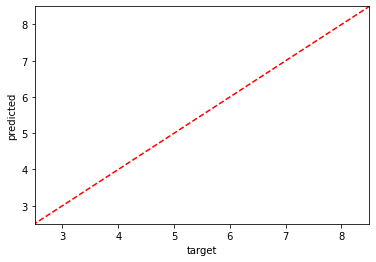

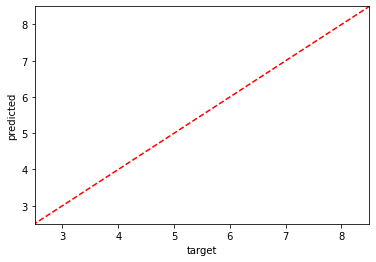

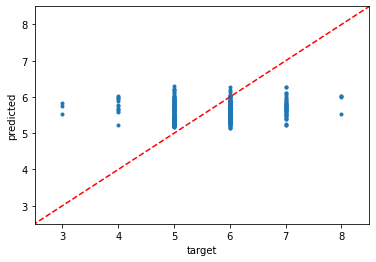

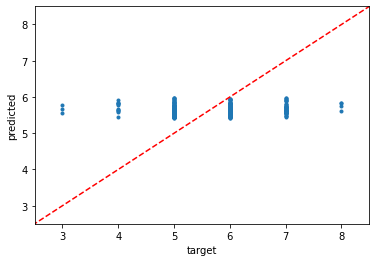

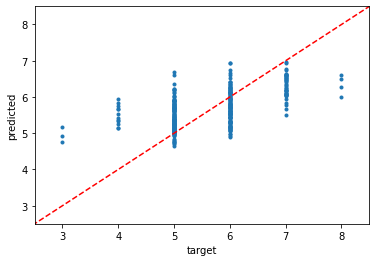

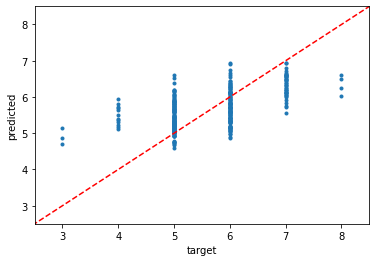

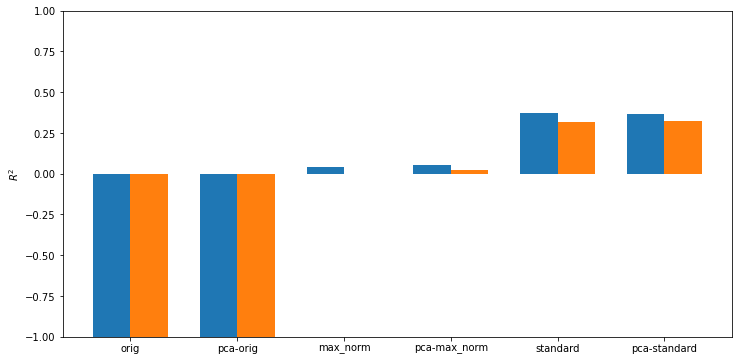

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split


# scaling modules
preps = [None, Normalizer(norm='max'), StandardScaler()]
# scaling module names
prec_names = ["orig", "max_norm", "standard"]

names = []
trainerr = []
testerr = []

# TODO: prepare data by defining X and T, then splitting dfwine data for train and test in 80/20
X = dfwine.drop('quality',axis=1)
T = dfwine.quality
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)



for k, prep in enumerate(preps):
    for i in range(2):
        if i == 0: # without PCA
            # TODO: create a pipelined SGD model with the scaler
            model = Pipeline([('scaler',prep),('regression',SGDRegressor())])
            names.append(prec_names[k])
        else:  # With PCA
            # TODO: create a pipelined SGD model with the scaler and PCA
            model = Pipeline([('scaler',prep),('reduce_dim', PCA()),('regression',SGDRegressor())])

            names.append("pca-{}".format(prec_names[k]))

        # TODO: train the model with training data
        model.fit(X_train,t_train)

        # 5) evaluate
        trainerr.append(model.score(X_train, t_train))
        testerr.append(model.score(X_test, t_test))
        print("Train score: ", trainerr[-1])
        print("Test score: ", testerr[-1])

        # prediction-vs-target plot
        plt.figure()
        y_test = model.predict(X_test)
        plt.plot(t_test, y_test, '.')
        plt.plot([0,10], [0, 10], 'r--')
        plt.xlim([2.5, 8.5])
        plt.ylim([2.5, 8.5])
        plt.xlabel("target")
        plt.ylabel("predicted")



# bar chart for comparision
plt.figure(figsize=(12, 6))
x = np.arange(len(names))
width = 0.35
plt.bar(x - width/2, trainerr, width, label='train')
plt.bar(x + width/2, testerr, width, label='test')

plt.xticks(x, names)
plt.ylabel("$R^2$")
plt.ylim([-1, 1])


`TODO17.4` Observe the results and share your thoughts about the difference with/without scaling or dimensionality reduction.

`Answer` SDG seems to be not suited for this dataset. When scaling is not done SDG does not work, as shown above. Adding pca increases the results of both max_norm and standard, where standard seems to work better.

<div id="TODO18"></div>

## Feedback (2 point)

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER` 5, This lab is a great intro into data preprocessing and sklearn pipeline.

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` Nothing was difficult, all the TODOs were clear.

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER` Everything was well explained.